# Import libraries

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Load Dataset and Analyze

In [88]:
# load the dataset and display the first five rows
df = pd.read_csv("student_data_no_total.csv")

In [89]:
# Display summary statistics of the training dataset
print("Summary Statistics of Training Data")
print(df.describe())

Summary Statistics of Training Data
       Attendance (%)  Assignment Completion (%)  Test Score (25%)  \
count   100000.000000              100000.000000     100000.000000   
mean        82.632180                  82.594290         16.517740   
std         10.928544                  11.157706          5.188246   
min         20.000000                   0.000000          8.000000   
25%         76.000000                  76.000000         12.000000   
50%         84.000000                  84.000000         17.000000   
75%         92.000000                  92.000000         21.000000   
max         99.000000                  99.000000         25.000000   

       Practical Score (25%)  Exam Score (50%)           Age  \
count          100000.000000     100000.000000  100000.00000   
mean               16.520070         29.037350      21.50054   
std                 5.196844         12.407324       2.29440   
min                 8.000000          8.000000      18.00000   
25%          

In [90]:
# Check for missing values in the training dataset
print("Checking for missing valuse in Training Data")
df.isnull().sum()

Checking for missing valuse in Training Data


Attendance (%)                             0
Assignment Completion (%)                  0
Test Score (25%)                           0
Practical Score (25%)                      0
Exam Score (50%)                           0
Performance                                0
Age                                        0
Gender                                     0
Marital Status                             0
Children (if Married)                      0
Mother Education                           0
Father Education                           0
Guardian (Sponsor)                         0
Extracurricular Activities                 0
Online Time (Daily)                        0
Family Relationship                        0
Free Time Activities                       0
Alcoholic Consumption                      0
Religious Programs (Weekly)                0
Computer/Laptop Access (for Practicals)    0
dtype: int64

# Data Preprocessing

In [91]:
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [92]:
# split the data into features and target variable
X = df.drop('Performance', axis=1)
y = df['Performance']

In [93]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation and Training

In [94]:
# Create the decision tree classifier
clf = DecisionTreeClassifier()

In [95]:
# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Model Prediction

In [96]:
# Make prediction on the test data
y_pred = clf.predict(X_test)

# Model Evaluation

In [97]:
# Calculate and print metrics 
print("Accuracy::", metrics.accuracy_score(y_test, y_pred))
print("Precision::", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall::", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1-Score::", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy:: 0.98325
Precision:: 0.9832321696873192
Recall:: 0.98325
F1-Score:: 0.9832382301594634


In [98]:
# View classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6541
           1       0.98      0.97      0.98      4773
           2       0.99      0.99      0.99      4383
           3       0.98      0.98      0.98      3170
           4       0.95      0.95      0.95      1036
           5       1.00      1.00      1.00        97

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [99]:
# Save the trained model to a file
joblib.dump(clf, 'student_performance_predictor.joblib')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.joblib')

print("Model saved successfully.")

Model saved successfully.


# Calculate Feature Importance

In [100]:
importances = clf.feature_importances_
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature' : X.columns, 'Importance' : importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

                                    Feature  Importance
4                          Exam Score (50%)    0.373725
1                 Assignment Completion (%)    0.197343
2                          Test Score (25%)    0.195780
3                     Practical Score (25%)    0.195176
0                            Attendance (%)    0.028681
13                      Online Time (Daily)    0.001293
17              Religious Programs (Weekly)    0.001246
5                                       Age    0.001030
11                       Guardian (Sponsor)    0.000884
10                         Father Education    0.000879
8                     Children (if Married)    0.000795
9                          Mother Education    0.000665
15                     Free Time Activities    0.000586
16                    Alcoholic Consumption    0.000521
18  Computer/Laptop Access (for Practicals)    0.000435
14                      Family Relationship    0.000334
7                            Marital Status    0

# Visualizations

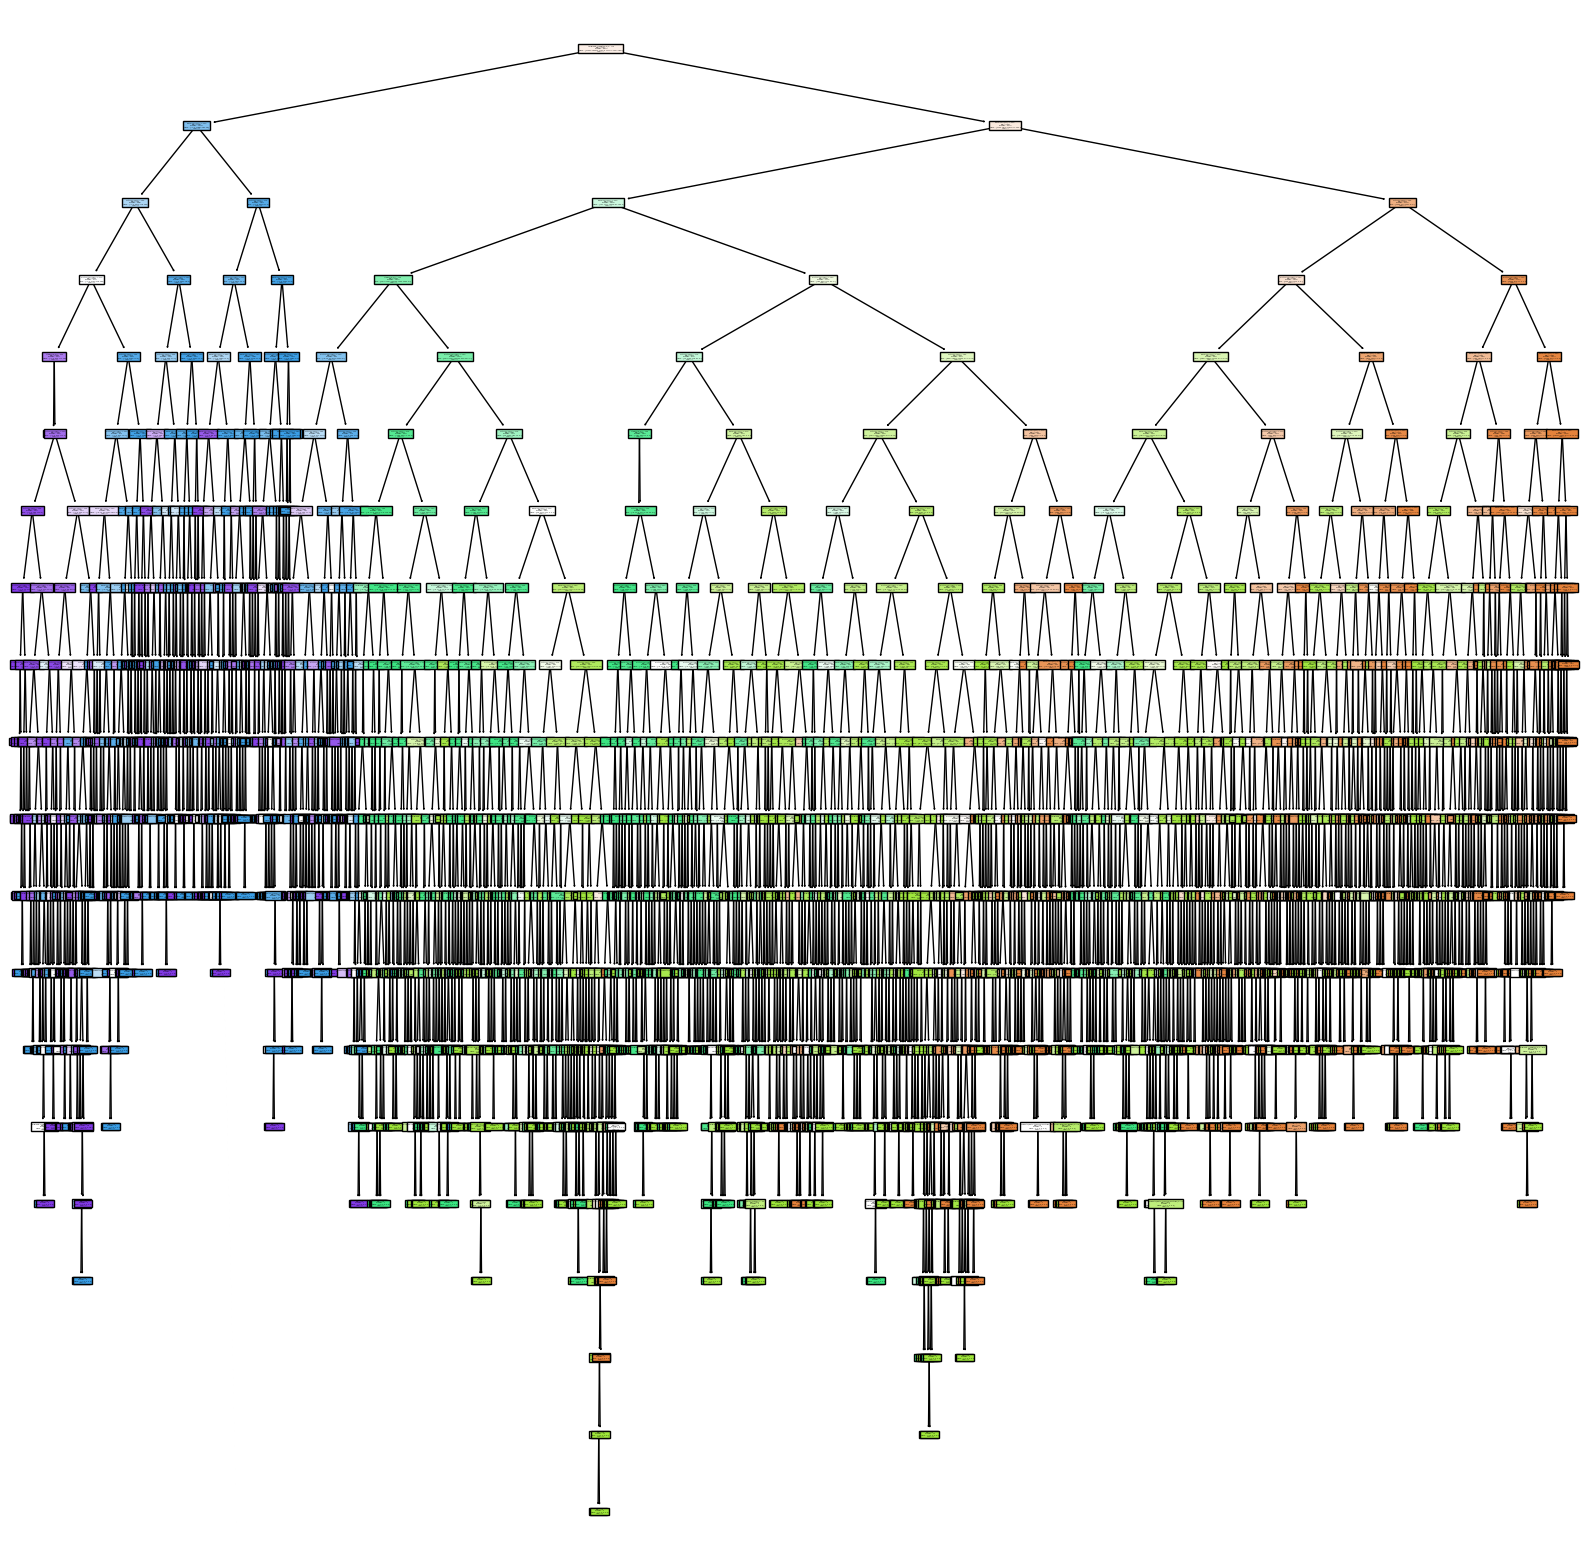

In [101]:
# Visualize the Decision Tree
plt.figure(figsize=(20,20))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['Performance'].classes_)
plt.savefig('decision_tree.jpg', dpi=600)
plt.show()

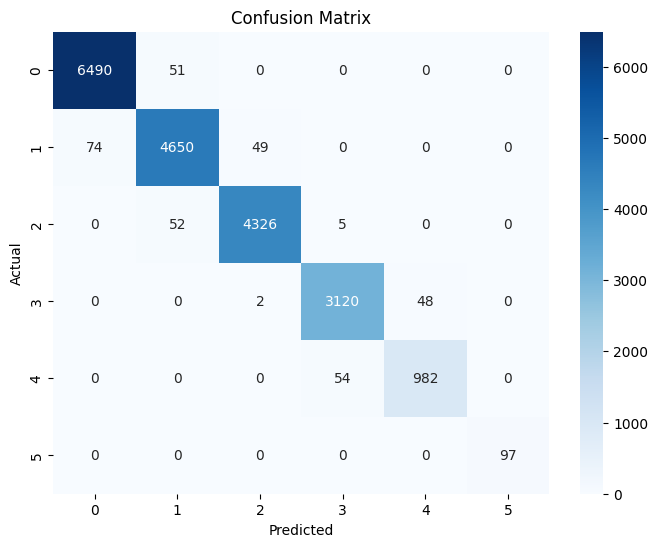

In [102]:
# Plot confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', dpi=300)
plt.show() 

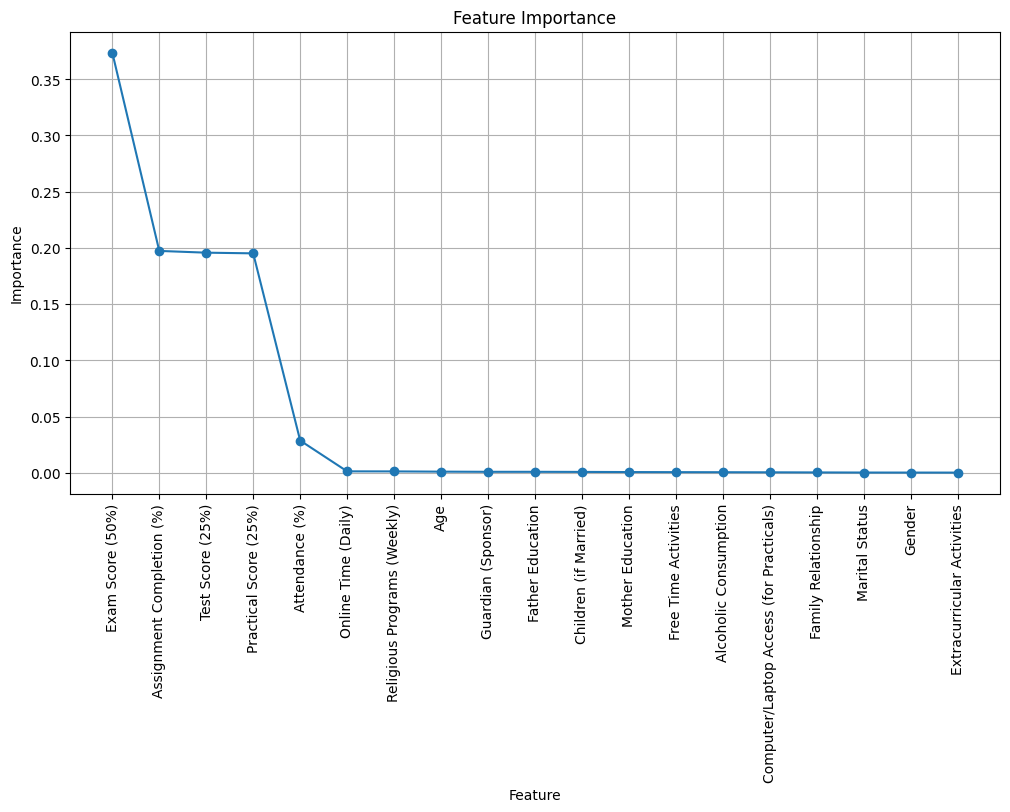

In [103]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.plot(feature_importances['Feature'], feature_importances['Importance'], marker='o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.savefig('feature_importance.jpg', dpi=300)
plt.show()

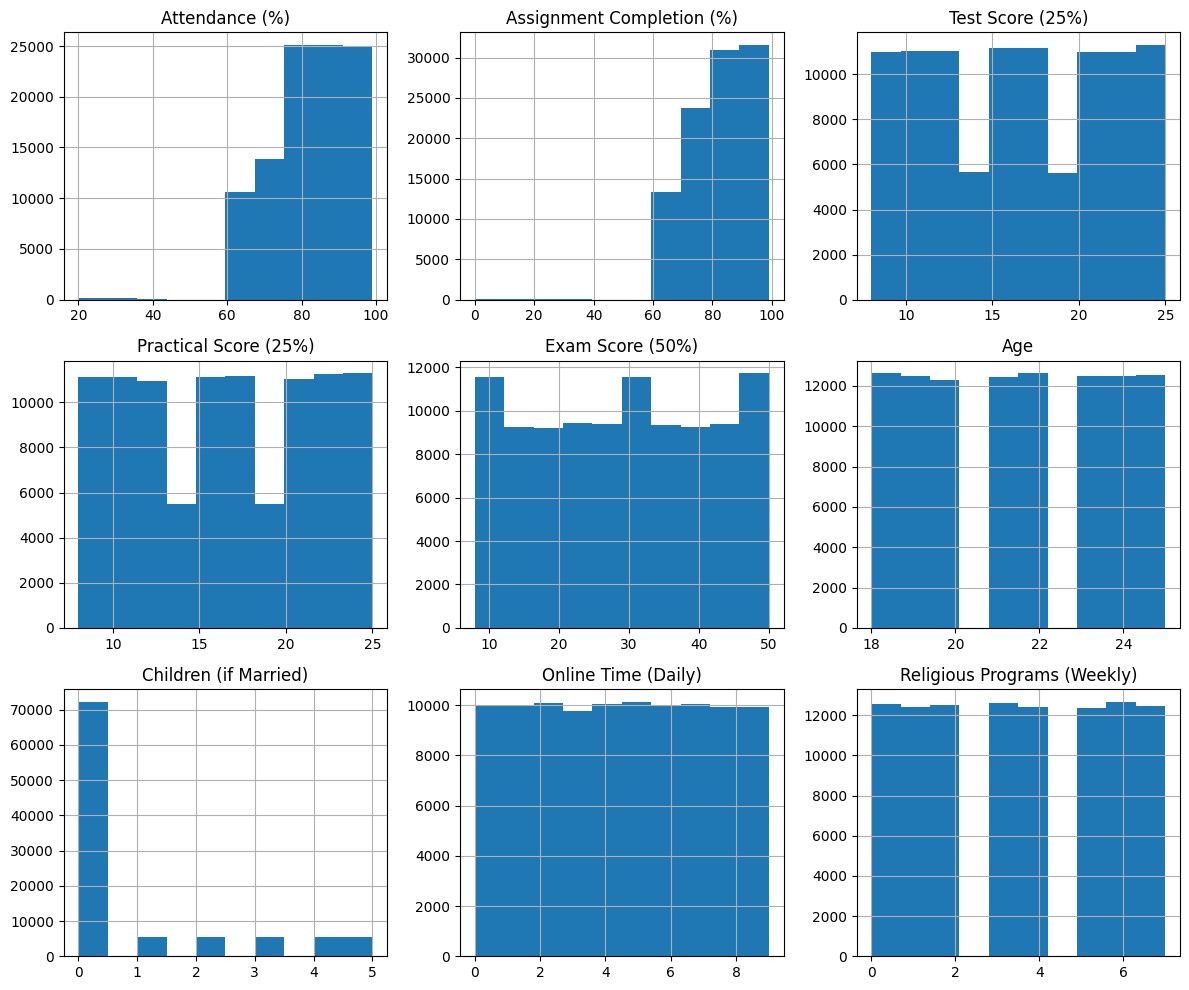

In [104]:
# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('feature_visualizations.jpg', dpi=300)
plt.show()

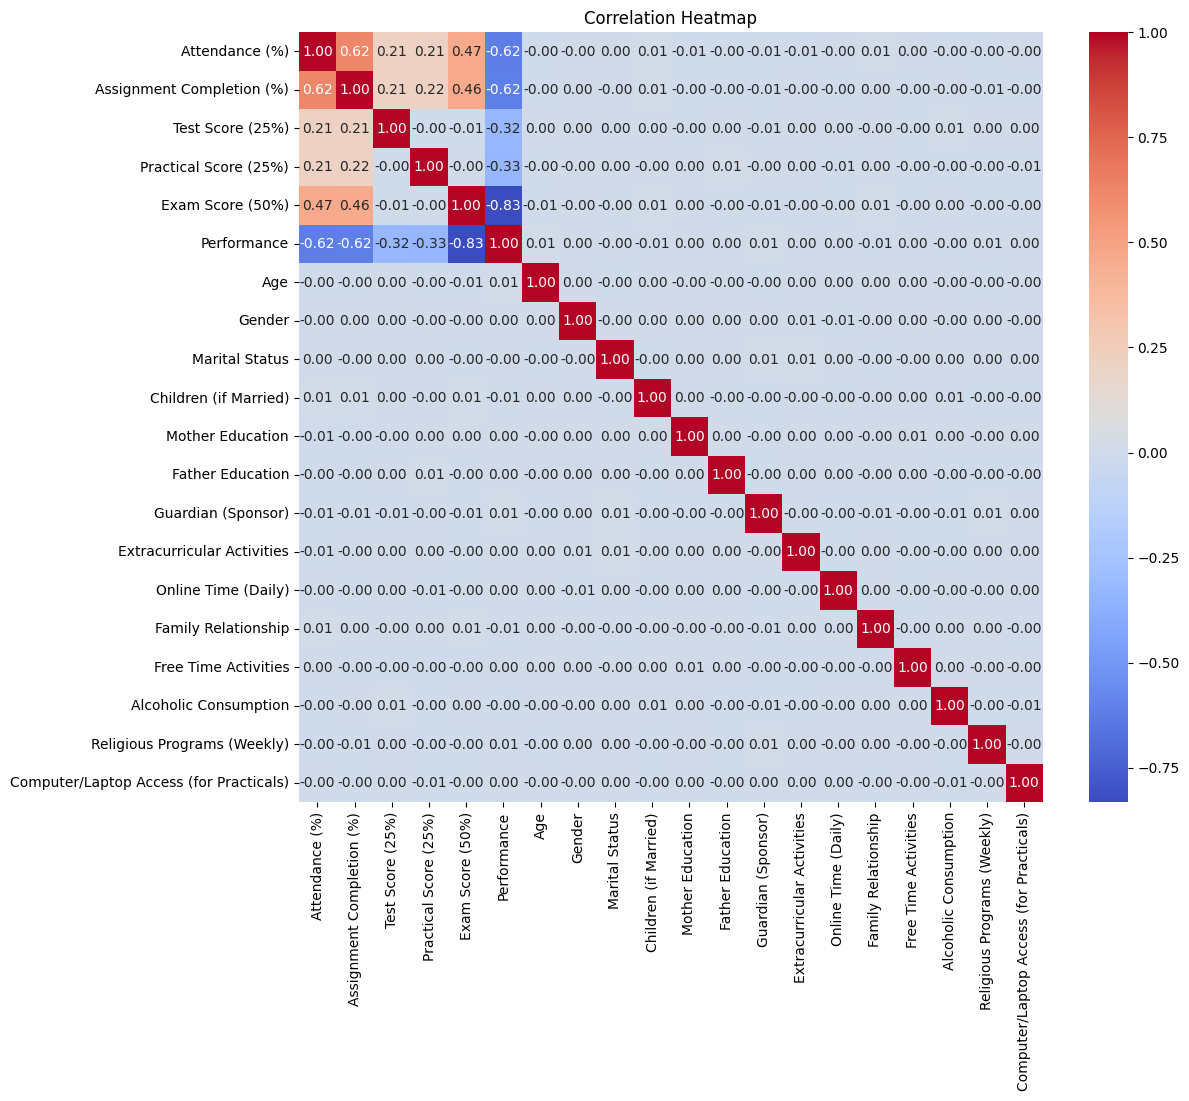

In [105]:
# Plot correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg', dpi=300)
plt.show()

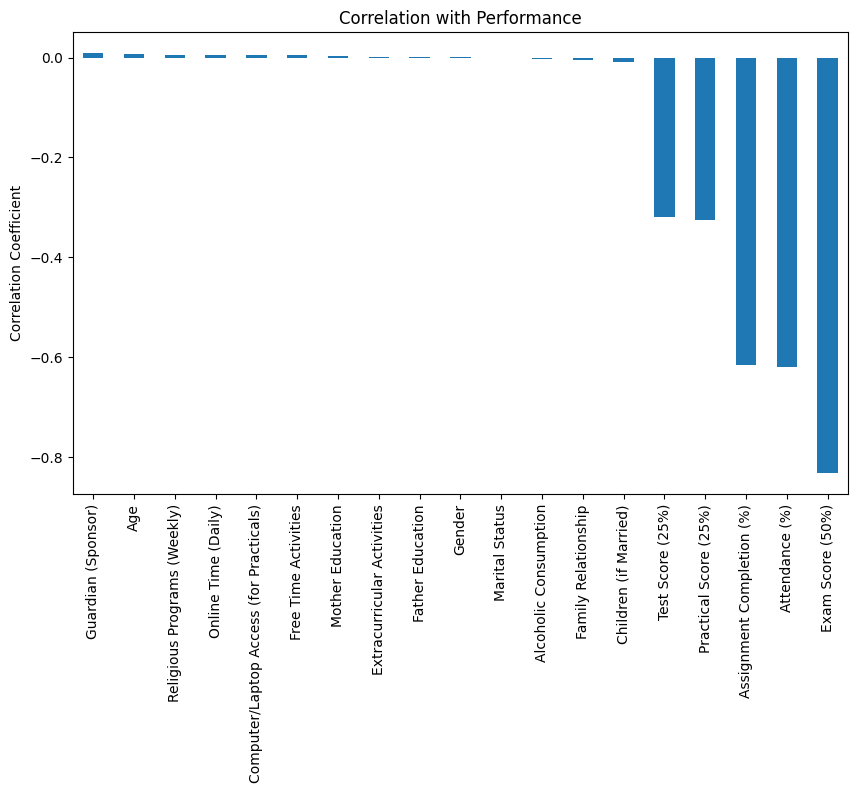

In [106]:
# Find correlations with Performance
correlations = df.corr()['Performance'].drop('Performance')
correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Performance')
plt.ylabel('Correlation Coefficient')
plt.savefig('feature_correlation.jpg', dpi=300)
plt.show()


# Test the Model

In [107]:
# Load the test dataset
df_test = pd.read_csv("student_data_test.csv")

# Apply label encoding to categorical variables
for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = label_encoders[column].transform(df_test[column])

# Split the test dataset into features and target variable
X_test = df_test.drop('Performance', axis=1)
y_test = df_test['Performance']

# Make predictions on the test dataset
y_pred_test = clf.predict(X_test)

# Evaluate the model
print("Accuracy on Test Data:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision on Test Data:", metrics.precision_score(y_test, y_pred_test, average='weighted'))
print("Recall on Test Data:", metrics.recall_score(y_test, y_pred_test, average='weighted'))
print("F1-Score on Test Data:", metrics.f1_score(y_test, y_pred_test, average='weighted'))
print(metrics.classification_report(y_test, y_pred_test))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.savefig('confusion_matrix_test.jpg', dpi=300)
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Total Score (100%)
